In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [22]:
df = pd.read_csv('mnist_train.csv')
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [23]:
labels = df['label']
print(type(labels))

<class 'pandas.core.series.Series'>


In [24]:
print(df.shape)
print('Labels:',len(labels))
print(labels.shape)

(42000, 785)
Labels: 42000
(42000,)


In [25]:
d = df.drop('label', axis = 1)
d.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [26]:
print(d.shape)


(42000, 784)


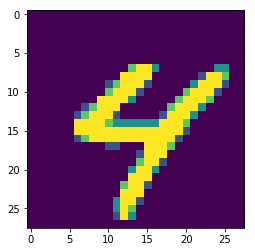

4


In [27]:
# visualising data.
digit = d.iloc[250].values.reshape(28,28)   # reshape 1d to 2d
plt.imshow(digit)
plt.show()
print(labels[250])


In [28]:
# lets pick first 15k points to work for the time efficiency
#perform all analysis on 42k data points
labels15k = labels.head(15000)
data15k = d.head(15000)
print('size of sample data', data15k.shape)
data15k.head()

size of sample data (15000, 784)


,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Objective : Project n-dimentional dataset into 2 dimentional plane.
### Step 0  : Data Preprocessing, Standardizing the data

In [29]:
from sklearn.preprocessing import StandardScaler
#data preprocessing
#standardizing the data ((xi - ui)/sigma
#returns numpy array
standardized_data = StandardScaler().fit_transform(data15k)
print('shape of standardised data ', standardized_data.shape)


shape of standardised data  (15000, 784)


### Step 1 : Finding the covariance matrix

In [30]:
# Finding the covariance of the matrix (Atranspose.A)
sample_data = standardized_data
covar_matrix = np.matmul(sample_data.T, sample_data)
print('Shape of covariance matrix = ', covar_matrix.shape)
sample_data = sample_data.T
print('Shape of Transposed sample data matrix = ', sample_data.shape)


Shape of covariance matrix =  (784, 784)
Shape of Transposed sample data matrix =  (784, 15000)


### Step 3: Eigen values (v)  and eigen vectors (lambda)

In [31]:
# Objective :  finding the top 2 eigen values to get the top two features from 784 features
# to project into 2 dimentional space
# if we want to project into 10 dimentions we will take top 10 eigen values.

from scipy.linalg import eigh

# the following code returns eigen values and eigen vectors in ascending order
# we care aboout the top 2 eigen vectors and eigen values of the covariance matrix of size(784,784),
# from 0,1,2....783 we need only 782 and 783rd eigen values.

values, vectors = eigh(covar_matrix, eigvals = (782,783))
print('shape of eigen vectors = ', vectors.shape)
vectors = vectors.T
print('updated shape of eigen vectors = ', vectors.shape)
vectors

shape of eigen vectors =  (784, 2)
updated shape of eigen vectors =  (2, 784)


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

### Step 3: Projecting from matplotlib.pyplot

In [32]:
new_coordinates = np.matmul(vectors, sample_data)
print('Resultant new data points', vectors.shape, 'x', sample_data.shape, '=', new_coordinates.shape)

import pandas as pd
# append labels to 2d projected data
# simply adding labels in the matrix
new_coordinates = np.vstack((new_coordinates, labels15k)).T
dataframe = pd.DataFrame(data = new_coordinates, columns = ('1st Principal', '2nd Principal', 'label'))
dataframe.head()

Resultant new data points (2, 784) x (784, 15000) = (2, 15000)


,1st Principal,2nd Principal,label
0,-5.558661,-5.043558,1.0
1,6.193635,19.305278,0.0
2,-1.909878,-7.678775,1.0
3,5.525748,-0.464845,4.0
4,6.366527,26.644289,0.0


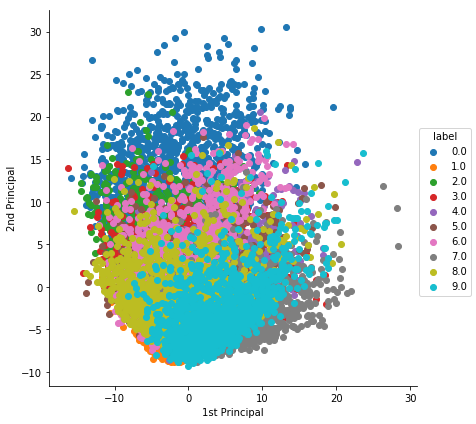

In [33]:
import seaborn as sns
sns.FacetGrid(dataframe, hue = 'label', size = 6).map(plt.scatter, '1st Principal', '2nd Principal').add_legend()

### PCA using scikit-Learn

In [34]:
from sklearn import decomposition
pca = decomposition.PCA()

pca.n_components = 2
pca_data = pca.fit_transform(sample_data).T

print('Shape reduced from 784 dimentions to new shape ', pca_data.shape)
print('Shape of labels ', labels.shape)

pca_data = np.vstack((pca_data, labels15k)).T
print(pca_data.shape)
dataframe = pd.DataFrame(data = pca_data, columns = ('1st Principal', '2nd Principal', 'label'))
dataframe.head()


Shape reduced from 784 dimentions to new shape  (2, 784)
Shape of labels  (42000,)


ValueError: all the input array dimensions except for the concatenation axis must match exactly

In [ ]:
sns.FacetGrid(dataframe, hue='label', size = 6).map(plt.scatter, '1st Principal', '2nd Principal').add_legend()